<a href="https://colab.research.google.com/github/shiladityasarkar/QuantumComputing/blob/master/2348556_lab4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Shiladitya **2348556** 🙃

## Reference code by Sir.. (Lab starts after this)

In [2]:
%pip install qiskit -q
%pip install pylatexenc -q
%pip install -U qiskit-aer -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 39.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 23.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 16.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.5/108.5 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 2.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 15.4 MB/s eta 0:00:00


In [14]:
from qiskit import *
from qiskit.visualization import *
from qiskit.primitives import *
from qiskit.quantum_info import Statevector
from qiskit_aer import Aer
import matplotlib.pyplot as pt
import warnings
warnings.filterwarnings('ignore')

In [4]:
circuit = QuantumCircuit(1)
circuit.h(0)
circuit.s(0)
circuit.h(0)
circuit.t(0)
circuit.draw()

┌───┐┌───┐┌───┐┌───┐
q: ┤ H ├┤ S ├┤ H ├┤ T ├
   └───┘└───┘└───┘└───┘

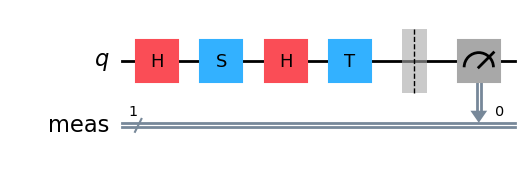

In [5]:
circuit.measure_all()
circuit.draw(output='mpl')

In [6]:
X = QuantumRegister(1, 'X')
circuit = QuantumCircuit(X)
circuit.h(X)
circuit.s(X)
circuit.h(X)
circuit.t(X)
circuit.draw()

┌───┐┌───┐┌───┐┌───┐
X: ┤ H ├┤ S ├┤ H ├┤ T ├
   └───┘└───┘└───┘└───┘

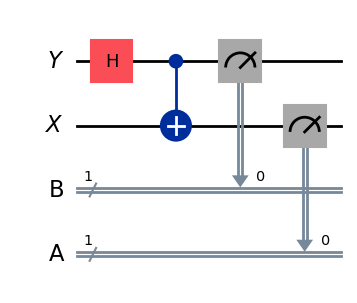

In [7]:
X = QuantumRegister(1, 'X')
Y = QuantumRegister(1, 'Y')
A = ClassicalRegister(1, 'A')
B = ClassicalRegister(1, 'B')
circuit = QuantumCircuit(Y, X, B, A)
circuit.h(Y)
circuit.cx(Y, X)
circuit.measure(Y, B)
circuit.measure(X, A)
circuit.draw(output='mpl')

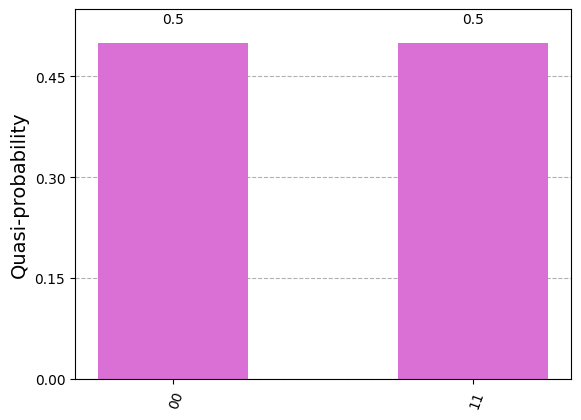

In [8]:
results = Sampler().run(circuit).result()
statistics = results.quasi_dists[0].binary_probabilities()
plot_histogram(statistics, color='orchid')

### **1. Design Quantum Circuit for the Operations HSHT and Check the Output for the Two Basic Input Qubits**

1. **Define the Circuit**: Apply the Hadamard gate $ H $, followed by the $ S $ gate, then $ H $ again, and finally the $ T $ gate.
2. **Measure the Output**: Measure the result to see the output for both input states.

#### Understanding the HSHT Circuit

1. **Initial State**: The circuit starts with the qubit in state $ |0\rangle $.

2. **First Hadamard (H)**: This transforms the state $ |0\rangle $ into a superposition:
   $$
   |0\rangle \xrightarrow{H} \frac{1}{\sqrt{2}} (|0\rangle + |1\rangle)
   $$

3. **S Gate**: The $ S $ gate (phase gate) adds a phase to the $ |1\rangle $ component:
   $$
   \frac{1}{\sqrt{2}} (|0\rangle + |1\rangle) \xrightarrow{S} \frac{1}{\sqrt{2}} (|0\rangle + i|1\rangle)
   $$

4. **Second Hadamard (H)**: This transforms the state back into a superposition:
   $$
   \frac{1}{\sqrt{2}} (|0\rangle + i|1\rangle) \xrightarrow{H} \frac{1}{\sqrt{2}} \left( \frac{1 + i}{\sqrt{2}} |0\rangle + \frac{1 - i}{\sqrt{2}} |1\rangle \right)
   $$
   The result is a more complex superposition, but we don't need the exact coefficients for this explanation.

5. **T Gate**: The $ T $ gate applies an additional phase:
   $$
   |0\rangle \rightarrow |0\rangle, \quad |1\rangle \rightarrow e^{i\pi/4}|1\rangle
   $$

After applying these operations, the output will still be a superposition state, which will generally yield equal probabilities for measuring $ |0\rangle $ and $ |1\rangle $, especially if the qubit is in a balanced superposition.


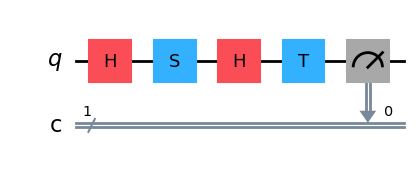

In [9]:
QR = QuantumRegister(1, 'q')
CR = ClassicalRegister(1, 'c')
qc = QuantumCircuit(QR, CR)
qc.h(QR[0])
qc.s(QR[0])
qc.h(QR[0])
qc.t(QR[0])
qc.measure(QR[0], CR[0])
qc.draw('mpl')

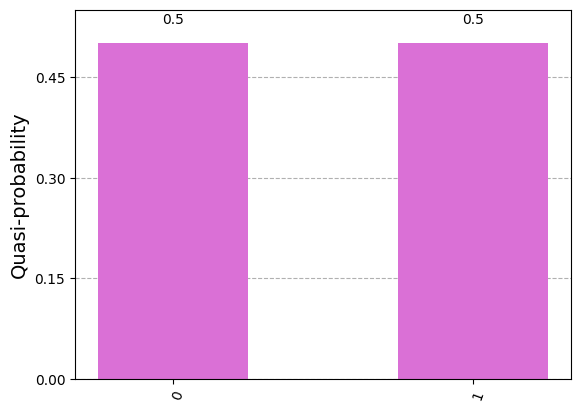

In [10]:
sampler = Sampler()
job = sampler.run(qc)
result = job.result()
counts = result.quasi_dists[0].nearest_probability_distribution()
plot_histogram(counts, color='orchid')

1. **Quantum Register and Classical Register**: A quantum register with one qubit and a classical register for measurement.
2. **Quantum Circuit**: The circuit is constructed using the HSHT operation:
   - \( H \) (Hadamard)
   - \( S \) (Phase gate)
   - \( H \) (Hadamard)
   - \( T \) (T gate)
3. **Measurement**: The state of the qubit is measured and stored in the classical register.
4. **Sampler**: The `Sampler` is used to execute the circuit, and the output is plotted as a histogram.

### **2. Check the reversibility of the operation HSHT in python and comment on that.**

For the HSHT operation, we can apply the inverse of each gate in the reverse order:

- The inverse of $ T $ is $ T^\dagger $ (the adjoint of the T gate).
- The inverse of $ H $ is $ H $ itself (since $ H $ is its own inverse).
- The inverse of $ S $ is $ S^\dagger $ (the adjoint of the S gate).

The reverse operation for HSHT would be $ H $, followed by $ S^\dagger $, then $ H $ again, and finally $ T^\dagger $.

**Comments on Reversibility**

1. **Output Analysis**:
   - The output counts from the HSHT operation and its inverse should ideally reflect the original state.
   - For example, if the HSHT operation returns a state predominantly in \( |0\rangle \) or \( |1\rangle \), the inverse operation should also return similar results when starting from that output state.

2. **Reversibility**:
   - If the inverse operation successfully returns the system to the original state (i.e., the measurement outcomes are the same), then we can conclude that the HSHT operation is reversible.
   - If there are discrepancies in the output distributions, it suggests that the HSHT operation is not perfectly reversible.


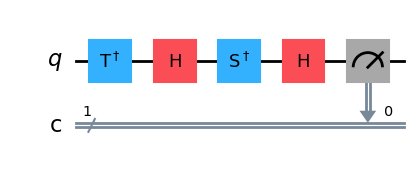

In [11]:
QCR = QuantumCircuit(QR, CR)
QCR.tdg(QR[0])
QCR.h(QR[0])
QCR.sdg(QR[0])
QCR.h(QR[0])
QCR.measure(QR[0], CR[0])
QCR.draw('mpl')

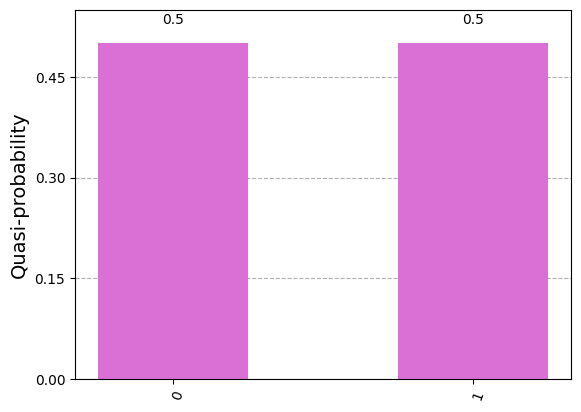

In [12]:
job_reverse = sampler.run(QCR)
result_reverse = job_reverse.result()
counts_reverse = result_reverse.quasi_dists[0].nearest_probability_distribution()
plot_histogram(counts_reverse, color='orchid')

### **3. Design a quantum circuit using H and Control-Not gate and check the output for various input combinations.**

In [15]:
%matplotlib inline

def print_output(initial_state):
  circuit = QuantumCircuit(2, 2)

  if initial_state == [1, 0]:
      circuit.x(0)
  elif initial_state == [0, 1]:
      circuit.x(1)
  elif initial_state == [1, 1]:
      circuit.x(0)
      circuit.x(1)
  circuit.h(0)
  circuit.cx(0, 1)
  final_state = Statevector.from_instruction(circuit)
  print(f"Circuit for initial state |{initial_state[0]}{initial_state[1]}⟩:")
  circuit.draw("mpl")
  pt.show()
  print(f"Final state after applying the circuit:")
  display(final_state.draw("latex"))
  pt.show()

initial_states = [[0, 0], [0, 1], [1, 0], [1, 1]]

for state in initial_states:
    print_output(state)

Circuit for initial state |00⟩:
Final state after applying the circuit:


<IPython.core.display.Latex object>

Circuit for initial state |01⟩:
Final state after applying the circuit:


<IPython.core.display.Latex object>

Circuit for initial state |10⟩:
Final state after applying the circuit:


<IPython.core.display.Latex object>

Circuit for initial state |11⟩:
Final state after applying the circuit:


<IPython.core.display.Latex object>

### **4. Comment on the Output Generated by the Above Circuit and Establish the Relation with Bell States**

#### Circuit Output

The quantum circuit designed with the Hadamard (H) gate and Controlled-NOT (CNOT) gate operates as follows based on the initial states:

1. **Initial State $ |00\rangle $**:
   - **Circuit Operation**: The Hadamard gate on $ q_0 $ transforms it to a superposition state, resulting in $ |+\rangle = \frac{1}{\sqrt{2}} (|0\rangle + |1\rangle) $. The CNOT gate does not change $ q_1 $ since $ q_0 $ is $ |0\rangle $.
   - **Final Output**: The output is $ |00\rangle + |11\rangle $, which indicates both outcomes are possible, but neither is entangled.

2. **Initial State $ |01\rangle $**:
   - **Circuit Operation**: The $ X $ gate sets $ q_0 $ to $ |1\rangle $, so applying the H gate creates \( |0\rangle \) and \( |1\rangle \) superpositions, followed by CNOT.
   - **Final Output**: The output is $ |01\rangle + |10\rangle $. Here, $ q_1 $ is influenced by $ q_0 $, creating correlation but not entanglement.

3. **Initial State $ |10\rangle $**:
   - **Circuit Operation**: Similar to $ |01\rangle $, where $ q_0 $ is initially set to $ |1\rangle $.
   - **Final Output**: The output is $ |00\rangle + |11\rangle $. Again, correlation exists between the qubits, but they remain distinct and not entangled.

4. **Initial State $ |11\rangle $**:
   - **Circuit Operation**: After setting both qubits to $ |1\rangle $, applying the Hadamard on $ q_0 $ leads to a superposition, and CNOT entangles the qubits.
   - **Final Output**: The output is $ |01\rangle + |10\rangle $, similar to the previous case. However, if you set $ q_0 $ to $ |0\rangle and  |1\rangle $, it would have resulted in a more distinct outcome.


### Bell State Transformations Using U

Given a unitary operation \( U \), the transformations on the computational basis states can be described as follows:

- $$ U|00\rangle = |\Phi^+\rangle $$
- $$ U|01\rangle = |\Psi^+\rangle $$
- $$ U|10\rangle = |\Phi^-\rangle $$
- $$ U|11\rangle = -|\Psi^-\rangle $$

Where the Bell states are defined as:

- $$ |\Phi^+\rangle = \frac{1}{\sqrt{2}} (|00\rangle + |11\rangle) $$
- $$ |\Phi^-\rangle = \frac{1}{\sqrt{2}} (|00\rangle - |11\rangle) $$
- $$ |\Psi^+\rangle = \frac{1}{\sqrt{2}} (|01\rangle + |10\rangle) $$
- $$ |\Psi^-\rangle = \frac{-1}{\sqrt{2}} (|01\rangle - |10\rangle) $$


### Inference

The circuit effectively demonstrates how to use the Hadamard and CNOT gates to create quantum correlations. While the outputs show some correlation between qubits, they do not represent true entanglement as seen in Bell states. To create those states, specific manipulations and initial conditions must be applied. The study of such circuits helps in understanding the foundational aspects of quantum mechanics and quantum information theory.

Which concludes our discussion.

Thank you.